In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing.image import img_to_array, load_img

model = load_model("14-dumps/model.keras")

In [2]:
label_classes = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

In [3]:
sample_data = []

for i in range(10):
  image = load_img(f"assets/image-label-{i}.png", target_size = (32, 32))
  image_array = img_to_array(image)

  # normalize features
  image_array = image_array / 255.0

  sample_data.append(image_array)

sample_data = np.array(sample_data)

In [4]:
predictions = model.predict(sample_data)

predictions = np.argmax(predictions, axis = 1)

predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


array([0, 1, 2, 3, 4, 5, 6, 5, 9, 9], dtype=int64)

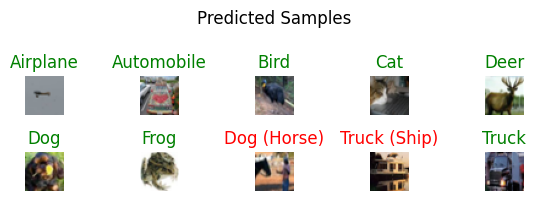

In [6]:
figure, axes = plt.subplots(2, 5, figsize = (6, 2))
axes = axes.ravel()

for i in range(len(axes)):
  predicted_class_index = predictions[i]
  predicted_class_name = label_classes[predicted_class_index]

  actual_class_index = i
  actual_class_name = label_classes[actual_class_index]

  title = predicted_class_name if predicted_class_index == actual_class_index else f"{predicted_class_name} ({actual_class_name})"
  title_color = "green" if predicted_class_index == actual_class_index else "red"    

  axes[i].set_title(title, color = title_color)
  axes[i].imshow(sample_data[i])
  axes[i].axis("off")

figure.suptitle("Predicted Samples")
plt.tight_layout()
plt.show()